In [1]:
# import standard modules
import numpy as np
import cv2, glob, pickle
import image_helper as ih

# import matplotlib modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# calibrate camera
# images = glob.glob('./camera_cal/calibration*.jpg')
# ih.calibrate_camera(images)

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

img = mpimg.imread("./camera_cal/calibration1.jpg")

# Use cv2.calibrateCamera() and cv2.undistort()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[1], img.shape[0]) ,None,None)

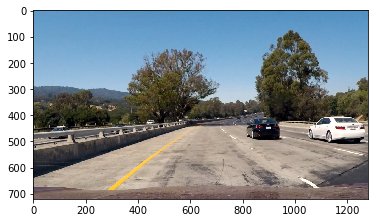

In [3]:
# read a sample image and show
image = mpimg.imread("./test_images/test1.jpg")
plt.imshow(image)

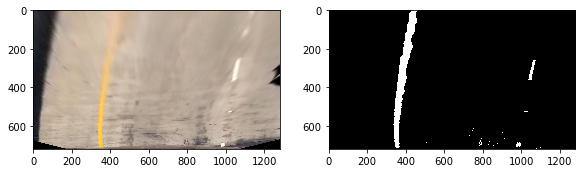

In [4]:
# warp the image after distortion correction
undistort_img = ih.undistort(image, mtx, dist)
warped, Minv = ih.warp(undistort_img)

# apply the combined threshold
binary_warped = ih.pipeline(warped, (130,255),(50,255),(40,255))
binary_warped = ih.region_of_interest(binary_warped)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(warped)
plt.subplot(1,3,2)
plt.imshow(binary_warped, cmap='gray')

C:\Users\syed.mateen\Documents\snmateen\technical\data science\udacity\carnd\advanced lane lines\image_helper.py:336: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)


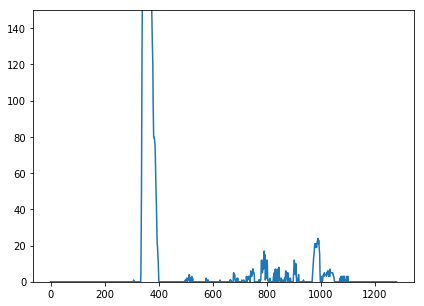

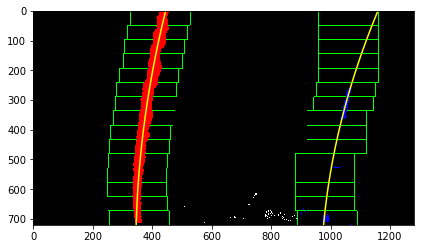

In [5]:
# fit polynomial
left_fit, right_fit, leftx, lefty, rightx, righty, ploty = ih.fit_polynomial(binary_warped, nwindows=15, plotit=True)

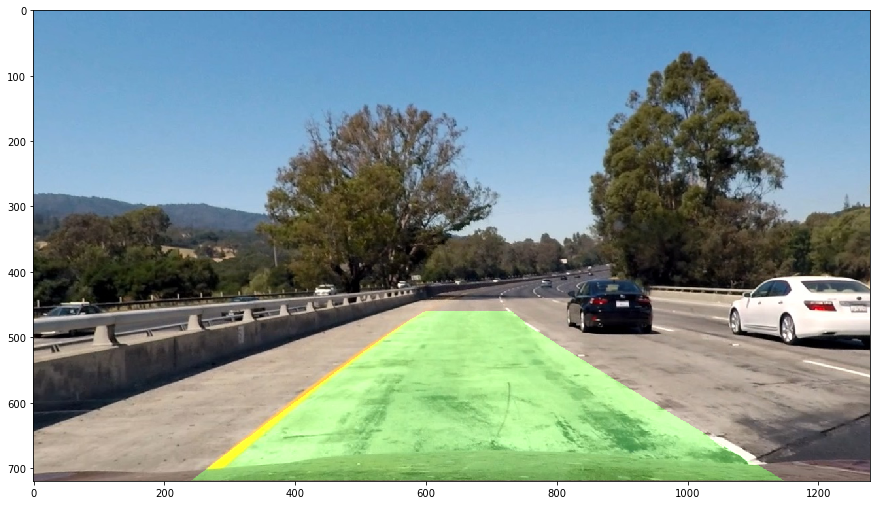

In [6]:
# curvature
left_rad, right_rad, offset = ih.calculate_curvature(binary_warped, leftx, lefty, rightx, righty)

# draw lanes on the original image
output_image = ih.draw_lanes(undistort_img, binary_warped, left_fit, right_fit, ploty, Minv)
plt.figure(figsize=(15,15))
plt.imshow(output_image)

C:\Users\syed.mateen\Documents\snmateen\technical\data science\udacity\carnd\advanced lane lines\image_helper.py:336: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)


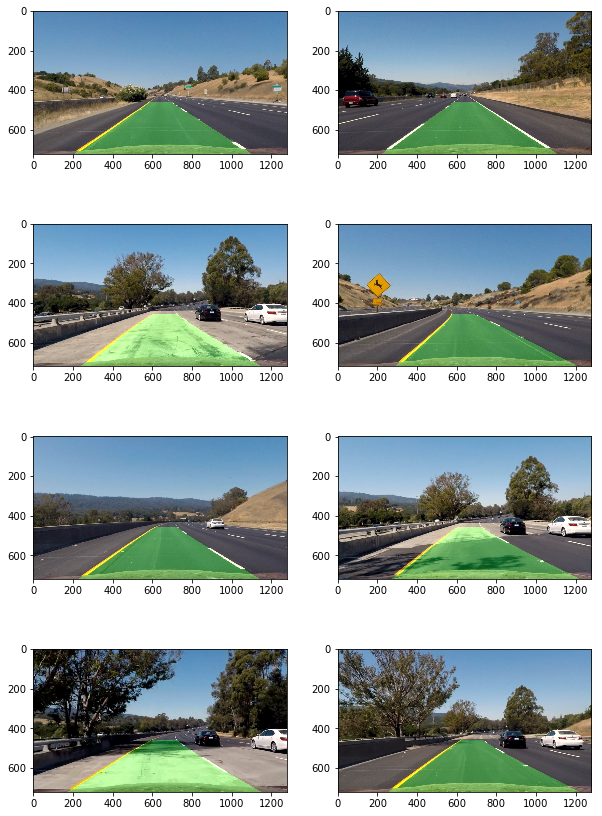

In [7]:
# lets apply this to all the images in "test images" folder
images = glob.glob("./test_images/*.jpg")
plt.figure(figsize=(10,15))
for i, img in zip(range(8), images):
    
    # read image
    image = mpimg.imread(img)
    
    # warp the image after distortion correction
    dst = ih.undistort(image, mtx, dist)
    warped, Minv = ih.warp(dst)

    # apply the combined threshold
    binary_warped = ih.pipeline(warped, (130,255),(50,255),(40,255))
    binary_warped = ih.region_of_interest(binary_warped)

    # fit polynomial
    left_fit, right_fit, leftx, lefty, rightx, righty, ploty = ih.fit_polynomial(binary_warped, nwindows=15, plotit=False)
    
    # draw lanes
    output_image = ih.draw_lanes(dst, binary_warped, left_fit, right_fit, ploty, Minv)
    
    # save the image in "output_images" folder
    mpimg.imsave("./output_images/" + "lanes_drawn_" + img.split("\\")[-1], output_image)
    
    # plot
    plt.subplot(4,2,i+1)
    plt.imshow(output_image)

In [1]:
import video_helper as vh
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
output = 'project_video_output.mp4'
clip2 = VideoFileClip('project_video.mp4')
output_clip = clip2.fl_image(vh.process_image)
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1260/1261 [03:32<00:00,  5.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 3min 34s
